generating data for single objcet detection

In [5]:
import sys
sys.path.append("../")
from MiniTransformersModels.MiniDetr import DetrModel
import torch
from torchvision.datasets import CocoDetection
from torchvision import transforms as T
from PIL import Image

# Chemins vers ton dataset mini COCO
img_dir = "../MiniTransformersModels/CoCoData/data/coco_mini/data"
ann_file = "../MiniTransformersModels/CoCoData/data/coco_mini/labels.json"

transform = T.Compose([
    T.Resize((128, 128)),   # tu peux changer la taille
    T.ToTensor()
])

dataset = CocoDetection(img_dir, ann_file, transform=transform)
images=torch.stack([e[0] for e in dataset])
boxes=torch.stack([torch.tensor(e[1][0]["bbox"]) for e in dataset])
labels=[e[1][0]["supercategory"] for e in dataset]
label_names=set(labels)
label2id={}
for i,name in enumerate(label_names):
    label2id[name]=i
labels=torch.tensor([label2id[name] for name in labels])
x=images
y=(labels,boxes)
xtrain=images[:10]
ytrain=(labels[:10],boxes[:10])
xtest=images[10:]
ytest=(labels[10:],boxes[10:])


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Training Data

In [6]:
model=DetrModel("adam","Crossentropy",128,1,12,128)
train_losses,val_losses,accs,val_accs=model.minibatch_SGD_train(1,xtrain,ytrain,xtest,ytest,batch_size=10,learning_rate=0.001,accuracy=True)

1 | Train Loss: 14961.7695 | Val Loss: 13466.4131 | Train Acc: 10.00% | Val Acc: 16.32%


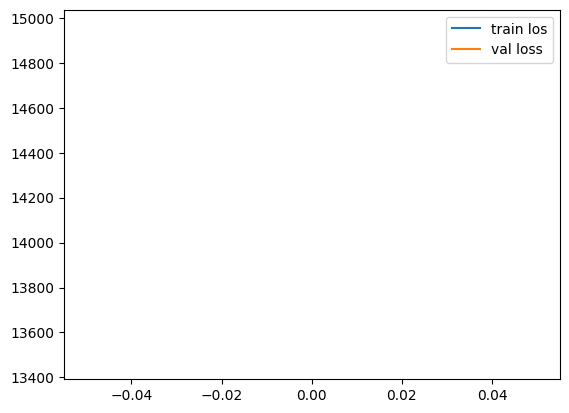

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)),train_losses,label="train los")
plt.plot(range(len(train_losses)),val_losses,label="val loss")
plt.legend()


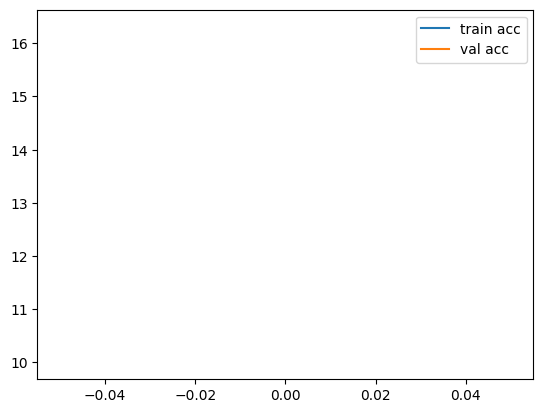

In [8]:
plt.plot(range(len(train_losses)),accs,label="train acc")
plt.plot(range(len(train_losses)),val_accs,label="val acc")
plt.legend()
